# Airline Arrivals Project

Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.
    1. The project should follow guideline as previous projects.
    2. Apply models in Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM.
    3. Apply PCA, SelectKBest and RFE for feature selections.
    4. Using gridsearchCV to obtain best parameters for models.
    5. Compare performances among models, write up analysis why the model is good or bad in the algorithmic approach (explain          why the algorithm is good or bad for the dataset structure, can you do something to improve the model?)
    6. Include the conclusions.

# Mục lục
      1. Phân tích dữ liệu
      2. Training
      3. Đánh giá và nhận xét

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import os

In [2]:
df=pd.read_csv("D:\\2008.csv")

In [3]:
df.shape

(7009728, 29)

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [8]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

# 1.Phân tích dữ liệu

## a. Giảm số cột

- Loại bỏ những cột được cho là không liên quan 
    Những Feature đó không làm ảnh hưởng đến chuyến bay đó có trể hay không:
        Ví dụ rõ nhất là TaxiIn hay Out thì không thể làm chuyến bay có trể hay không.

In [9]:
df = df.drop(columns=['FlightNum','TailNum','AirTime','TaxiIn','TaxiOut','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)

- Loại bỏ dòng có số lượng chuyến bay hủy >=1 "Cancelled"
    vì chuyến bay đã hủy thì không thể làm chuyến bay bị trể được.

In [10]:
df = df.drop(df.index[df["Cancelled"] != 0].tolist())

Sau khi xử lý xong dữ liệu Row của cột Cancelled tiến hành xóa cột.

In [11]:
df = df.drop('Cancelled',axis=1)

In [12]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime              14215
CRSArrTime               0
UniqueCarrier            0
ActualElapsedTime    17265
CRSElapsedTime         598
ArrDelay             17265
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
dtype: int64

## b. Xử lý giá trị Null

In [13]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ActualElapsedTime,17265,99.748774
1,ArrDelay,17265,99.748774
2,ArrTime,14215,99.793155
3,CRSElapsedTime,598,99.991298
4,Year,0,100.000000
5,Month,0,100.000000
6,DayofMonth,0,100.000000
7,DayOfWeek,0,100.000000
8,DepTime,0,100.000000
9,CRSDepTime,0,100.000000


Dự trên kết quả sau ta thấy các cột có giá trị Null chiếm tỉ lệ rất nhỏ so với tập dữ liệu (0.2% ~ 0.3%)
    Vì vậy quyết định loại bỏ các Rows của dữ liệu có giá trị Null

In [14]:
df = df[df.ArrDelay.notnull()]

In [15]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,WN,88.0,90.0,-6.0,-4.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,34.0,34.0,IND,BWI,515


In [16]:
## c. Biến đổi dữ liệu theo thời gian

In [17]:
import datetime
# Chuyển đổi thời gian từ định dạng 'hhmm' sang datetime để dễ xử lý
def Conver_hhmm(data):
    if pd.isnull(data):
        return np.nan
    else:
        if data == 2400: data = 0
        data = "{0:04d}".format(int(data))
        data = datetime.time(int(data[0:2]), int(data[2:4]))
        return data

In [18]:
# Thay đổi thời gian 2400 thành 0000
df.loc[(df['DepTime'] ==2400),'DepTime'] = "0000"
df.loc[(df['CRSDepTime'] ==2400),'CRSDepTime'] = "0000"
df.loc[(df['ArrTime'] ==2400),'ArrTime'] = "0000"
df.loc[(df['CRSArrTime'] ==2400),'CRSArrTime'] = "0000"

In [19]:
#Chuyển đổi lại các cột có giá trị ngày giờ: hhmm -> hh:mm
df['DepTime'] = (df['DepTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['DepTime'].astype(int)%100).astype(int).astype(str)+ ':00'
df['CRSDepTime'] = (df['CRSDepTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['CRSDepTime'].astype(int)%100).astype(int).astype(str)+ ':00'
df['ArrTime'] = (df['ArrTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['ArrTime'].astype(int)%100).astype(int).astype(str)+ ':00'
df['CRSArrTime'] = (df['CRSArrTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['CRSArrTime'].astype(int)%100).astype(int).astype(str)+ ':00'

In [20]:
def get_minustes(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m)

Biến đổi dữ liệu sang phút

In [21]:
df['DepTime'] = df['DepTime'].apply(lambda x: get_minustes(x))

In [22]:
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: get_minustes(x))
df['ArrTime'] = df['ArrTime'].apply(lambda x: get_minustes(x))
df['CRSArrTime'] = df['CRSArrTime'].apply(lambda x: get_minustes(x))

In [23]:
# Hàm tính số phút giữa hai mốc thời gian
def TimeSpan(Time1,Time2):
    TS = 0
    hm1 = Time1.split(':')
    hm2 = Time2.split(':')
    if(hm2[0] == hm1[0]):
        mmresult = abs(float(hm2[1])-float(hm1[1]))
    if(hm2[0] > hm1[0]):
        TS = float(hm2[0])*60  + float(hm2[1]) - float(hm1[0])*60-float(hm1[1])
    else:
        TS = (float(hm2[0]))*60  + float(hm2[1]) + (23-float(hm1[0]))*60+60-float(hm1[1])
    return TS

## d. Biến đổi dữ liệu

### - Tính trễ khi > 30 phút

In [24]:
# Biến đổi dữ liệu: Trễ = 1 , Không trễ = 0
df['ArrDelay'] = np.where(df['ArrDelay']>30, 1, 0)         

In [25]:
df.shape

(6855029, 16)

In [26]:
# Xem data Trễ
dfLate = df[df['ArrDelay'] ==1]
dfLate.shape

(901398, 16)

In [27]:
#df.to_csv("D:\\AirLineInfo2008.csv")

Trên tập dữ liệu tỉ lệ chuyến bay trễ chiếm khoản 13.1%

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

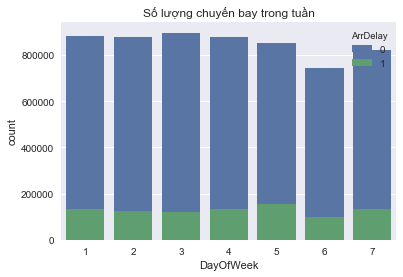

In [29]:
sns.set()
ax = sns.countplot(x='DayOfWeek',data=df,hue='ArrDelay',dodge=False)
ax.set_title('Số lượng chuyến bay trong tuần')
plt.show()

Dựa vào đồ thị cho thấy hầu như chuyến bay trễ qua các ngày trong tuần có biến đổi nhưng không đáng kể.
    Chỉ có ngày T6 là có biến động lớn: Do lượng khách hàng tăng đột biến và để chuẩn bị cho ngày nghĩ T7, CN.

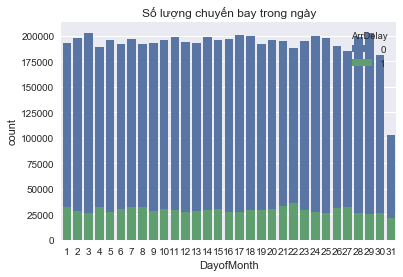

In [30]:
sns.set()
ax = sns.countplot(x='DayofMonth',data=df,hue='ArrDelay',dodge=False)
ax.set_title('Số lượng chuyến bay trong ngày')
plt.show()

Dựa vào đồ thị cho thấy hầu như chuyến bay trễ qua các ngày có biến đổi nhưng không đáng kể.

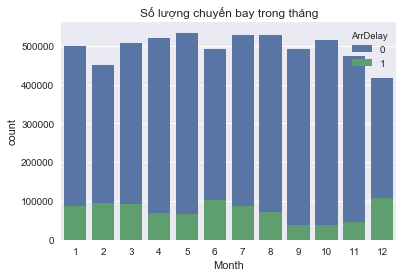

In [31]:
sns.set()
ax = sns.countplot(x='Month',data=df,hue='ArrDelay',dodge=False)
ax.set_title('Số lượng chuyến bay trong tháng')
plt.show()

Dựa vào đồ thị cho thấy chuyến bay trễ trong tháng biến động lớn đặt biệt ở tháng 6 và tháng 12.
    - Ở tháng 12 là thời gian cận tết nên việc đi lại và sắp xếp các phương tiện máy bay chuẩn bị đón tết nhiều có thể sãy ra tình trạng trễ.
    - ở tháng 6: Có thể do thời gian đi du lịch, nghĩ dưỡng nhiều số lượng tăng cao nên có thể dẫn đến trễ.

In [32]:
# Tổng hợp dữ liệu ngày, tháng, năm thành 1 cột

In [33]:
df['Day'] = df['DayofMonth']

In [34]:
df['DATE'] = pd.to_datetime(df[['Year','Month','Day']])

In [35]:
df = df.drop(columns=['Year','Month','Day','DayofMonth','DayOfWeek'], axis=1)

In [36]:
df.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'DATE'],
      dtype='object')

In [37]:
df.dtypes

DepTime                       int64
CRSDepTime                    int64
ArrTime                       int64
CRSArrTime                    int64
UniqueCarrier                object
ActualElapsedTime           float64
CRSElapsedTime              float64
ArrDelay                      int32
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
DATE                 datetime64[ns]
dtype: object

In [38]:
### - Biến đổi LabelEncoder()


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
df['UniqueCarrier'] = le.fit_transform(df['UniqueCarrier'])

In [41]:
df['Origin'] = le.fit_transform(df['Origin'])

In [42]:
df['Dest'] = le.fit_transform(df['Dest'])

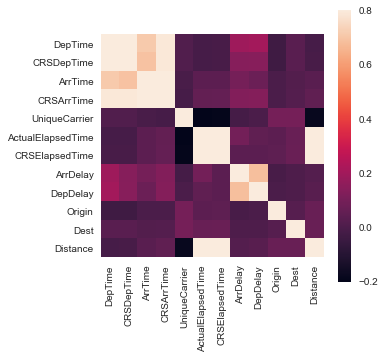

In [43]:
f0, ax0 = plt.subplots(figsize=(5, 5))
corrmat0 = df.corr()
sns.heatmap(corrmat0, vmax=0.8, square=True)
plt.show()

    - Ta thấy ArrDay có tương quan cao với DepDelay 
    - Xãy ra trường hợp đa cộng tuyến (Distance tương quan cao với AcctualElapsedTime và CRSElapsedTime

# 2. Training

## a. Biến đỗi dữ liêu

In [44]:
df.dtypes

DepTime                       int64
CRSDepTime                    int64
ArrTime                       int64
CRSArrTime                    int64
UniqueCarrier                 int64
ActualElapsedTime           float64
CRSElapsedTime              float64
ArrDelay                      int32
DepDelay                    float64
Origin                        int64
Dest                          int64
Distance                      int64
DATE                 datetime64[ns]
dtype: object

In [45]:
#df[['UniqueCarrier']] = df[['UniqueCarrier']].astype(int)

In [46]:
X = df[['DepTime','CRSDepTime','ArrTime','CRSArrTime','UniqueCarrier','ActualElapsedTime','CRSElapsedTime','DepDelay','Origin','Dest','Distance']]

In [47]:
X.dtypes

DepTime                int64
CRSDepTime             int64
ArrTime                int64
CRSArrTime             int64
UniqueCarrier          int64
ActualElapsedTime    float64
CRSElapsedTime       float64
DepDelay             float64
Origin                 int64
Dest                   int64
Distance               int64
dtype: object

In [48]:
y=df['ArrDelay']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Chia data thành 2 phần: training data, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# a. Naïve Bayes

- Gaussian Naive Bayes


In [57]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.model_selection import train_test_split
import sklearn

In [58]:
pipe_lrNB = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clfNB', GaussianNB())])

In [59]:
prLNB1 = pipe_lrNB.fit(X_train, y_train)

In [60]:
y_prNB1 = prLNB1.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prNB1))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1190829
          1       0.15      0.00      0.00    180177

avg / total       0.77      0.87      0.81   1371006



In [62]:
for i in range(1,11,2):
        pipe_lrNB.set_params(pca__n_components = i)
        prNB2 = pipe_lrNB.fit(X_train, y_train)
        y_prNB2=prNB2.predict(X_test)
        print(classification_report(y_test, y_prNB2))

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1190829
          1       0.00      0.00      0.00    180177

avg / total       0.75      0.87      0.81   1371006

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1190829
          1       0.15      0.00      0.00    180177

avg / total       0.77      0.87      0.81   1371006

             precision    recall  f1-score   support

          0       0.92      1.00      0.96   1190829
          1       0.94      0.46      0.62    180177

avg / total       0.93      0.93      0.91   1371006

             precision    recall  f1-score   support

          0       0.92      0.98      0.95   1190829
          1       0.76      0.45      0.57    180177

avg / total       0.90      0.91      0.90   1371006

             precision    recall  f1-score   support

          0       0.92      0.98      0.95   1190829
          1       0.74      0.47 

Với K = 10 tốt nhất đạt độ chính xác 90%

In [63]:
#Sử dụng thử với SelectKBest

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k_filterNB = SelectKBest(f_regression, k=11)
pipe_lrNB = Pipeline([('scl', StandardScaler()),('kbest', k_filterNB),('clfNB', GaussianNB())])
prNB3 = pipe_lrNB.fit(X_train, y_train)

In [65]:
y_prNB3=prNB3.predict(X_test)
print(classification_report(y_test, y_prNB3))

             precision    recall  f1-score   support

          0       0.97      0.96      0.97   1190829
          1       0.77      0.82      0.79    180177

avg / total       0.95      0.94      0.94   1371006



In [66]:
for i in range(1,5,1):
    k_filterNB4 = SelectKBest(f_regression, k=i)
    pipe_lrNB4 = Pipeline([('scl', StandardScaler()),('kbest', k_filterNB4),('clfNB', GaussianNB())])
    prNB4 = pipe_lrNB4.fit(X_train, y_train)
    y_prNB4=prNB4.predict(X_test)
    print(classification_report(y_test, y_prNB4))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   1190829
          1       0.83      0.81      0.82    180177

avg / total       0.95      0.95      0.95   1371006

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   1190829
          1       0.81      0.82      0.81    180177

avg / total       0.95      0.95      0.95   1371006

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   1190829
          1       0.80      0.82      0.81    180177

avg / total       0.95      0.95      0.95   1371006

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   1190829
          1       0.79      0.82      0.81    180177

avg / total       0.95      0.95      0.95   1371006



K=1 cho kết quả tốt nhất 95%

# b. Logistic Regression

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Vì vậy thay vì lần lượt làm 3 công đoạn riêng.
Tạo 1 Pipeline có nhiệm vụ kết hợp 3 Object: StandardScaler, PCA, LogisticRegression.

In [68]:
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=100))])
prLR1 = pipe_lr.fit(X_train, y_train)

In [69]:
y_prLR1=prLR1.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
F1_scoreLR1 = classification_report(y_test, y_prLR1)

In [71]:
print(F1_scoreLR1)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1190829
          1       1.00      0.00      0.00    180177

avg / total       0.89      0.87      0.81   1371006



Trong trường hợp muốn set lại parameter cho model hoặc các transform object làm như sau:

In [72]:
for i in range(1,11,2):
    pipe_lr.set_params(pca__n_components = i, clf__C=0.5)
    prLR2 = pipe_lr.fit(X_train, y_train)
    y_prLR2=prLR2.predict(X_test)
    print(i)
    print(classification_report(y_test, y_prLR2))

1
             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1190829
          1       1.00      0.00      0.00    180177

avg / total       0.89      0.87      0.81   1371006

3
             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1190829
          1       1.00      0.00      0.00    180177

avg / total       0.89      0.87      0.81   1371006

5
             precision    recall  f1-score   support

          0       0.96      0.99      0.98   1190829
          1       0.90      0.75      0.82    180177

avg / total       0.95      0.96      0.95   1371006

7
             precision    recall  f1-score   support

          0       0.96      0.99      0.98   1190829
          1       0.90      0.76      0.82    180177

avg / total       0.96      0.96      0.96   1371006

9
             precision    recall  f1-score   support

          0       0.98      0.99      0.98   1190829
          1       0.92 

với K=10 cho kết quả tốt với f1_score = 97%

In [73]:
#Sử dụng thử với SelectKBest

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k_filter = SelectKBest(f_regression, k=11)
pipe_lr = Pipeline([('scl', StandardScaler()),('kbest', k_filter),('clf', LogisticRegression(random_state=100))])
prLR3 = pipe_lr.fit(X_train, y_train)

In [75]:
y_prLR3=prLR3.predict(X_test)
print(classification_report(y_test, y_prLR3))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1190829
          1       1.00      1.00      1.00    180177

avg / total       1.00      1.00      1.00   1371006



In [76]:
y_prLR4=prLR3.predict(X_train)
print(classification_report(y_train, y_prLR4))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   4762802
          1       1.00      1.00      1.00    721221

avg / total       1.00      1.00      1.00   5484023



Xãy ra tình trạng Overfit

# c. Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)


from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

# d. Random Forest

In [78]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

TH1 với PCA

In [79]:
pipe_lrRF = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clfRF', RandomForestClassifier())])
prRF1 = pipe_lrRF.fit(X_train, y_train)

In [80]:
y_prRF1=prRF1.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prRF1))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92   1190829
          1       0.25      0.06      0.10    180177

avg / total       0.79      0.85      0.81   1371006



In [ ]:
#for i in range(1,11,2):
   # for j in range(1,400,50):
    #    pipe_lrRF.set_params(1pca__n_components = i, clfRF__n_estimators=j)
    #    prRF2 = pipe_lrRF.fit(X_train, y_train)
    #    y_prRF2=prRF2.predict(X_test)
    #    print(i)
     #   print(classification_report(y_test, y_prRF2))

TH2 với SelectKBest

In [85]:
k_filterRF3 = SelectKBest(f_regression, k=11)
pipe_lrRF3 = Pipeline([('scl', StandardScaler()),('kbest', k_filterRF3),('clfRF', RandomForestClassifier())])
prRF3 = pipe_lrRF3.fit(X_train, y_train)

In [86]:
y_prRF3=prRF3.predict(X_test)
print(classification_report(y_test, y_prRF3))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00   1190829
          1       0.98      0.96      0.97    180177

avg / total       0.99      0.99      0.99   1371006



Tỉ lệ dự đoán trên tập Test 99%

In [ ]:
y_prRF3N=prRF3.predict(X_train)
print(classification_report(y_test, y_prRF3N))

In [92]:
parameters = dict(feature_selection__k=[100, 200], clfRF__estimator=[100, 200],clfRF__min_samples_split=[2, 3, 4, 5, 10])
#pipe_lrRF4 = Pipeline([('scl', StandardScaler()),('kbest', k_filterRF3),('clfRF', RandomForestClassifier())])
cv = GridSearchCV(pipe_lrRF3, param_grid=parameters)
cv.fit(X_train, y_train)

ValueError: Invalid parameter feature_selection for estimator Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=11, score_func=<function f_regression at 0x0000018181035510>)), ('clfRF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
y_predictions = cv.predict(X_test)
sklearn.metrics.classification_report( y_test, y_predictions )

Trong trường hợp muốn set lại parameter cho model hoặc các transform object làm như sau:

# e. SVM

In [93]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [97]:
pipe_lrSVC = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clfSVC', SVC(C=100,kernel='rbf'))])

In [ ]:
prSVC1 = pipe_lrSVC.fit(X_train, y_train)

In [ ]:
y_prSVC1=prSVC1.predict(X_test)
print(classification_report(y_test, y_prSVC1))

In [ ]:
for i in range(1,11,3):
    for j in range(1,200,50):
        prSVC1.set_params(pca__n_components = i, clfRF__C=j)
        prSVC2 = prSVC1.fit(X_train, y_train)
        y_prSVC2=prSVC2.predict(X_test)
        print(i)
        print(j)
        print(classification_report(y_test, y_prSVC2))

In [ ]:
param_grid = {'C':[1,100,150,250,300],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf', 'poly']}
grid = GridSearchCV(('scl', StandardScaler()),SVC(),param_grid,refit = True, verbose=2)
prSVC2=grid.fit(X_train,y_train)

In [ ]:
y_prSVC2=prSVC2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_prSVC2))

# 3. Đánh giá và nhận xét

In [ ]:
Dựa trên kết quả ta thấy